<a href="https://colab.research.google.com/github/patriciamedyna/Classifier_page/blob/main/RVLCDIP_without_tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! [ -e /content ] && pip install -Uqq fastai

     |████████████████████████████████| 189 kB 4.3 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 


In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook

     |████████████████████████████████| 720 kB 3.9 MB/s 
     |████████████████████████████████| 48 kB 7.0 MB/s 
     |████████████████████████████████| 1.2 MB 66.7 MB/s 
     |████████████████████████████████| 558 kB 71.9 MB/s 
     |████████████████████████████████| 51 kB 318 kB/s 
     |████████████████████████████████| 130 kB 68.8 MB/s 


In [ ]:
#hide
from fastbook import *
from IPython.display import display,HTML

In [ ]:
from fastai.basics import *
from fastai.text.core import *
from fastai.text.data import *
from fastai.text.models.core import *
from fastai.text.models.awdlstm import *
from fastai.callback.rnn import *
from fastai.callback.progress import *
from fastai.text.all import *
from fastai.text import *
from datetime import datetime

In [ ]:
seed = 42

# python RNG
import random
random.seed(seed)

# pytorch RNGs
import torch
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)

# numpy RNG
import numpy as np
np.random.seed(seed)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Datasets/RVL_CDIP/labels/'
df_train = pd.read_csv(path + 'train.csv', delimiter=',', error_bad_lines=False, index_col=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_train['is_valid'] = False

In [ ]:
df_train.head(2)

,label,text,is_valid
0,1,"7002 00 OF (2 DOCUMENT CLEARANCE SHEET P (For Original Contracts Only) 2004-00-00 CONTRACT # CONTRACT SUBJECT: \TCHBL 1 COMPANY: |. BEI INS BRAND(s): _CAMEL TOTAL COST: _$528,000 CURRENT YEAR EFO: _($528,000: BRIEF DESCRIPTION: _D. D. BEAN WILL PRODUCE AND DISTRIBUTE UP TO 264,000 CASES _ OF PRINTED CAMEL ADVERTISING ON MATCHBOOKS, PROGRAM] G/L CODE: 04-73-4600-8215-855 LINE ITEM: 200737-072402 *IMPLEMENTOR: _S. B. DRISKE! **BRAND MANAGEMENT: __E. C. LEARY. TRVOICE APPROVAL AUTHORITY INVOICE APPROVAL AUTHORITY REVIEW ROUTING: DEPARTMENT = ____NAME ___swqwarure __DATE 7G 7-242 ave wouteD FI...",False
1,7,"‘CABARRUS COUNTY EFFECTIVE DATE: 03/08/93, MARLBORO 100 REGULAR SP RED STANOARO. PRODUCTION BRAND CODE-00540 (S10) CIoARETTE LENGTH =: 99.5, mM FTOTAR «16.0 Movolor 15.5 = 17.4 ToBAcco ROD ciRcUM, —: 24.80 va TOBACCO ROD LENGTH reo vt FicTER LeneTh ans 14 Tipp ine LENGTH 311500 vot TOTAL R.T.0, leo aM, W20 DILUTION TARGET 14.0 +/- 5.0 % TIPPING PAPER /USE UP: 631M X 3000! coRK DGL Eo-T01 12-4l-B LASER PERF. REPLACE WITH 631M X 3000M CORK DGL_ «KE GSRH75712-500-A LASER PERF. GLUE ROLLER/ | REFER TO ENGINEERINGS LUE ROLLER VARIABLE PARTS CATALOG = TIPPING INFORMATION + BY TYPE=TIPPER AND CIG...",False


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Datasets/RVL_CDIP/labels/'
df_test = pd.read_csv(path + 'test.csv', delimiter=',', error_bad_lines=False, index_col=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_test.head(2)

,label,text
0,3,"""$1730 6722 he (qey . ~ 266) “SOL sr Mem won Faunp = py 1°H Spree conn xf Aya “A NALD vor yee ~ PAOLO T Sy uw yr, GP od diz SL ene OL oi"
1,14,"CO-INVESTIGATOR NAME POSITION/TITLE BIRTHDATE Robert H. McCusker, Jr. Res. Assistant Professor 11-12-54 EDUCATION Institution/ Year ‘Field of Location Degree Conferred Study The Pennsylvania State Univ. B.S. The Pennsylvania State Univ. M.S. 1980 Physiology The University of Georgia Ph.D. 1985 Foods & Nutr. RESEARCH AND PROFESSIONAL EXPERIENCE 1980-1982 Senior Research Aide, The Pennsylvania state University 1985-1986 Research Fellowship, The University of North Carolina at Chapel Hill, NRSA, NIH Training Grant, Lineberger Comprehensive Cancer Research Center 1986-1988 Research Fellowship..."


In [ ]:
df_unsup = df_test.drop(columns=['label'])

In [ ]:
df_unsup.head(2)

,text
0,"""$1730 6722 he (qey . ~ 266) “SOL sr Mem won Faunp = py 1°H Spree conn xf Aya “A NALD vor yee ~ PAOLO T Sy uw yr, GP od diz SL ene OL oi"
1,"CO-INVESTIGATOR NAME POSITION/TITLE BIRTHDATE Robert H. McCusker, Jr. Res. Assistant Professor 11-12-54 EDUCATION Institution/ Year ‘Field of Location Degree Conferred Study The Pennsylvania State Univ. B.S. The Pennsylvania State Univ. M.S. 1980 Physiology The University of Georgia Ph.D. 1985 Foods & Nutr. RESEARCH AND PROFESSIONAL EXPERIENCE 1980-1982 Senior Research Aide, The Pennsylvania state University 1985-1986 Research Fellowship, The University of North Carolina at Chapel Hill, NRSA, NIH Training Grant, Lineberger Comprehensive Cancer Research Center 1986-1988 Research Fellowship..."


In [ ]:
df_val = pd.read_csv(path + 'val.csv', delimiter=',', error_bad_lines=False, index_col=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_val['is_valid'] = True

In [ ]:
df_val.tail(4)

,label,text,is_valid
39995,11,"‘a.coweames ‘esocon, PHILIP MORRIS + uannceuen conoraTon VOUCHER “ameonvonaTs TE VOUSREN PREPARED ane ane TESOORTIG EOE F atl Rapesonabe concen sco noe soon ‘aNein ‘Whit KS 67219 F al sooo ROTATE RTO JecSeunmnin 3/92 [roneu conus RETURN TO: WAM oeranruenr BuLBNarLoOR [PHONED \Tomave ssaucamin ) lon soe e570 EASON FOR REQUEST: ACCOUNTING USE ONLY vewoons________couar___9 cowrntesosaanncenenr ar0xNconPonnteD) VOUCHER TYPE__((-Reg; 2-P9.20M; 4.M; 5C.P; 69.0; 7A) VOUCHERINVOICE DATE ‘BANK—>____ DUE DATES. SEP CHK» _FReouency ALTPAYEE--> 01000 + AMTPCT ‘AuwreRCD—> DESC» UNE002 CORP/ACCT OF Lese...",True
39996,15,"ATION INTIAL MINNESOTA TOBACCO LITIG CONFIDE (B&W) PROTECTED BY. MINNESOTA TOBACCO LITIGATION PROTECTIVE ORDER BRT PLANNING DEPT TEL: aa-7i-222-7979 9.Jun.93 16:55 no.016 P05 « - _ . BAT INDUSTRIES SnterOffice Memo Tor TS Members From: Miss HC Barton Date: June 9, 1993 Subject: _ TSG Mites T ntach nuts ofthe TSG iectiog on Sth May lease note thatthe Septetber meeting wll be fortwo days, Wesneséay 8th and Thuraiay ‘th September, Ut may be bed ontside Wiedsor House, at a location in or near London, 10 be advised as 1000 as posible, and wil inchde dinner on Wesnesday th September. {In sition ...",True
39997,9,"THE WASHINGTON STAR Saturday, August 3, 1968 Clearing the Air TLwas a bold and hopeful stroke for the Federal Trade Commission to urge the end of all cigarette advertising on television, Equally and perhaps even ‘more important is the recent sugges- tion of the American. Cancer Society that smoking be curtailed in program content, The society reports that someone 1s, smoking in 73 percent of movies, 72 per- cent of action-adventure shows, 60 per- cent of dramas and 49 percent of variety programs, with scattered returns among Other types. Oddly, there is no isting for interminable discussio...",True
39998,15,"Bey keke gy 7 Cenc ou rept? MEMORANDUM March 16, 1992 TO: Mr. Charles A. Adamo HA 2 4 92 Dr. Manuel C. Bourlas Dr. James L. Charles / Dr. E. J. (Rick) Guardia 4 Dr. Kenneth S. Houghton Mr. Allen J. Kassman Mr. Robert G. McVicker Mr. Arthur J. Rehberger Dr. Paul G. Roehrig Mr. Danny Strickland 3S FROM: Dr. Charles J. Cante At our February committee meeting, Ken Houghton asked if | could investigate into Corporate and Private programs sponsoring Science and Engineering stimuli in grade schools, secondary schools, colleges and universities. The reason for this request was. so that’ the Commit...",True


In [ ]:
df = pd.concat([df_train, df_val],ignore_index=True)

In [ ]:
df.shape, df_train.shape, df_test.shape, df_val.shape

((359998, 3), (319999, 3), (39998, 2), (39999, 3))

In [ ]:
df

,label,text,is_valid
0,1,"7002 00 OF (2 DOCUMENT CLEARANCE SHEET P (For Original Contracts Only) 2004-00-00 CONTRACT # CONTRACT SUBJECT: \TCHBL 1 COMPANY: |. BEI INS BRAND(s): _CAMEL TOTAL COST: _$528,000 CURRENT YEAR EFO: _($528,000: BRIEF DESCRIPTION: _D. D. BEAN WILL PRODUCE AND DISTRIBUTE UP TO 264,000 CASES _ OF PRINTED CAMEL ADVERTISING ON MATCHBOOKS, PROGRAM] G/L CODE: 04-73-4600-8215-855 LINE ITEM: 200737-072402 *IMPLEMENTOR: _S. B. DRISKE! **BRAND MANAGEMENT: __E. C. LEARY. TRVOICE APPROVAL AUTHORITY INVOICE APPROVAL AUTHORITY REVIEW ROUTING: DEPARTMENT = ____NAME ___swqwarure __DATE 7G 7-242 ave wouteD FI...",False
1,7,"‘CABARRUS COUNTY EFFECTIVE DATE: 03/08/93, MARLBORO 100 REGULAR SP RED STANOARO. PRODUCTION BRAND CODE-00540 (S10) CIoARETTE LENGTH =: 99.5, mM FTOTAR «16.0 Movolor 15.5 = 17.4 ToBAcco ROD ciRcUM, —: 24.80 va TOBACCO ROD LENGTH reo vt FicTER LeneTh ans 14 Tipp ine LENGTH 311500 vot TOTAL R.T.0, leo aM, W20 DILUTION TARGET 14.0 +/- 5.0 % TIPPING PAPER /USE UP: 631M X 3000! coRK DGL Eo-T01 12-4l-B LASER PERF. REPLACE WITH 631M X 3000M CORK DGL_ «KE GSRH75712-500-A LASER PERF. GLUE ROLLER/ | REFER TO ENGINEERINGS LUE ROLLER VARIABLE PARTS CATALOG = TIPPING INFORMATION + BY TYPE=TIPPER AND CIG...",False
2,10,"4 LEO BURNETT U.S.A. : ADVERTISING . NEWSPAPER ESTIMATE RECKP ~ PNOt PERIOD DATE 03/08/81 01/01/80 70 12/31/80 PAGE 1 CLIENT: P.M. INC. OFFICE: 10 DESC: 703A MARLBORO RED ROP EST NO: 0008 REVISES EST DTD 02/08/91 cross. Ross. Gross PRopucT PeRTOD AMOUNT CHANGE LESS C/D tO-MARLBORO YAN 1990 8,624.00 8,624.00 Fee 25,872.00 28,872.00 mar 68,982.00 8,992.00 QUARTER + 103,488.00 103488 .00 AeR 98,403.06 88,403.06 may 71,868.00 71,868.00 UN 43, 120.00 431 120.00 QUARTER 2 203,301.06 203/391.06 ul 32,472.00 32,472.00 aug 57,024.00 57,024.00 SEP 57,042.82 57,042.82 QuaRTER 3 146,506.82 146,808.82 ...",False
3,3,"1 2. OFF, This mest oe 4 (okel 2.000 FF ne my ram EB 4 pack or'1 BMS reli “E ee Th sein",False
4,14,"CURRICULUM VITAE: Name: tzhack Polacheck, Ph.D. Position Title: Assoc. Prof, EDUCATION: Institution and Location Degree Year Field of Study Hebrew University Jerusalem, Israel BSe 1969 Bichemisiry & Microbiology Hebrew University Jerusalem, Israel MSc. 1971 Microbiology Hebrew University Jerusalem, Israel PhD. 1977 Microbiology NIAMD, NIH, MD, USA. Post. Doc. 1978 Microbivlony NIAID, NIH, MD, USA Post Dec. 1981 Medical Mycology Professional Experience: 1972-1976: Hebrew University Jerusalem, Israel ,Assistant. 1973: Universite de Liege, Liege, Belgium EMBO Short-term Fellowship, Research f...",False
...,...,...,...
359993,10,"The Tobacco Institute Industry Support of Biomedical Research 1981 INSTITUTION TOTAL ALABAMA University of Southern Alabama $46,619 ARIZONA Arizona Health Sciences Center 5,500 SALIORNIA California Biomedical Research Foundation 75,000 Huntington Memorial Institute 97,955 San Diego State University 76,175 Scripps Clinic & Research Foundation 84,132 Stanford University 59,570 University of California Berkeley 76,934 University of California Davis 87,400 University of California Irvine 50,000 University of California San Diego 3875192 University of California San Francisco 506,650 University...",True
359994,11,"‘a.coweames ‘esocon, PHILIP MORRIS + uannceuen conoraTon VOUCHER “ameonvonaTs TE VOUSREN PREPARED ane ane TESOORTIG EOE F atl Rapesonabe concen sco noe soon ‘aNein ‘Whit KS 67219 F al sooo ROTATE RTO JecSeunmnin 3/92 [roneu conus RETURN TO: WAM oeranruenr BuLBNarLoOR [PHONED \Tomave ssaucamin ) lon soe e570 EASON FOR REQUEST: ACCOUNTING USE ONLY vewoons________couar___9 cowrntesosaanncenenr ar0xNconPonnteD) VOUCHER TYPE__((-Reg; 2-P9.20M; 4.M; 5C.P; 69.0; 7A) VOUCHERINVOICE DATE ‘BANK—>____ DUE DATES. SEP CHK» _FReouency ALTPAYEE--> 01000 + AMTPCT ‘AuwreRCD—> DESC» UNE002 CORP/ACCT OF Lese...",True
359995,15,"ATION INTIAL MINNESOTA TOBACCO LITIG CONFIDE (B&W) PROTECTED BY. MINNESOTA TOBACCO LITIGATION PROTECTIVE ORDER BRT PLANNING DEPT TEL: aa-7i-222-7979 9.Jun.93 16:55 no.0

## Create DataLoader

In [ ]:
def get_features(r):

  return r['text']

def get_labels(r):

  return r['label']

In [ ]:
df_train.keys()

Index(['label', 'text', 'is_valid'], dtype='object')

In [ ]:
df_train.label.value_counts(), df_val.label.value_counts()

(0     20144
 8     20068
 13    20066
 10    20054
 14    20054
 3     20034
 9     20007
 4     19998
 12    19985
 15    19976
 7     19956
 11    19955
 2     19940
 1     19936
 5     19917
 6     19909
 Name: label, dtype: int64, 11    2575
 1     2537
 15    2533
 7     2531
 2     2530
 6     2526
 9     2526
 4     2522
 13    2517
 5     2508
 10    2485
 12    2468
 8     2451
 3     2434
 0     2430
 14    2426
 Name: label, dtype: int64)

In [ ]:
dblock_train = DataBlock(
    blocks=(TextBlock.from_df(text_cols=['text'], seq_len=72), CategoryBlock),
            get_x=get_features, 
            get_y=get_labels,
            splitter = ColSplitter(col='is_valid'))
            

dls = dblock_train.dataloaders(df, bs=128)
#dls.show_batch(max_n=2)

## Classification Model

In [ ]:
now = datetime.today().strftime('%Y-%m-%d-%H:%M:%S')

In [ ]:
# checkpoint 
cbs=[SaveModelCallback()]

In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, path='/content/drive/MyDrive/Colab Notebooks/Datasets/RVL_CDIP/checkpoints',metrics=[error_rate, accuracy, Perplexity()]).to_fp16()

In [30]:
# ajuste do modelo
learn.fine_tune(12, 1e-2, cbs=cbs)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.657685,0.702048,0.211430,0.788570,2.017882,11:54


Better model found at epoch 0 with valid_loss value: 0.7020482420921326.


epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.560309,0.684177,0.204730,0.795270,1.982140,30:15
1,0.659001,0.661520,0.203180,0.796820,1.937736,30:12


Better model found at epoch 0 with valid_loss value: 0.6841772198677063.
Better model found at epoch 1 with valid_loss value: 0.6615201234817505.


epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.560309,0.684177,0.204730,0.795270,1.982140,30:15
1,0.659001,0.661520,0.203180,0.796820,1.937736,30:12
2,0.661266,0.646248,0.194680,0.805320,1.908368,30:14
3,0.485426,0.674244,0.206405,0.793595,1.962549,30:15
4,0.572132,0.652090,0.186955,0.813045,1.919549,30:12
5,0.496016,0.643312,0.187305,0.812695,1.902772,30:15
6,0.448446,0.628467,0.191305,0.808695,1.874734,30:12
7,0.422515,0.669823,0.187105,0.812895,1.953890,30:12
8,0.309790,0.660118,0.180730,0.819270,1.935021,30:15
9,0.301336,0.673988,0.181605,0.818395,1.962047,30:14


Better model found at epoch 2 with valid_loss value: 0.6462481617927551.
Better model found at epoch 5 with valid_loss value: 0.6433116793632507.
Better model found at epoch 6 with valid_loss value: 0.6284669637680054.
Better model found at epoch 10 with valid_loss value: 0.6187943816184998.


In [31]:
learn.show_results()

,text,category,category_
0,"xxbos si ai xxup experimental xxup g4 ) xxmaj tit xxunk . aoe men ee eae pets xxup eos et na cop dak ch xxup pore ai nt insite icon xxup xxunk tue xxunk xxmaj tips xxmaj eatin , to os bg xxup of mm cg 8 xxup xxunk tnd xxunk 2s , xxmaj nae , xxmaj sot nm xxunk tur xxunk . ( outst , xxmaj sen ) , of parm . uni , xxmaj teese , ead pr . tale , ore pyrrole a8 po ees xxmaj bis ais pase . ages “ eby xxunk ) xxmaj be xxmaj pam . ( sie ce . xxmaj ethyl xxunk , acetic acid st ugh xxunk ( xxunk g. ) wae xxunk tn 800 ml . of facil xxunk acid , with 6 g- of 5b medium on xxunk ( 16 ) as the xxmaj xxunk at room xxunk and",6,6
1,"xxbos xxunk xxmaj biochemistry , xxmaj vol . 30 , xxmaj no . 45 , 1991 xxunk of tubulin would be expected to render the binding sites of tubulin poorly xxunk wo xxup g , , and data in xxmaj figure 5 and xxmaj table i are consistent with that expectation “ the association constant for tubulin dimers is similar to that ( 130 am ) for the binding of xxmaj gs to tubulin ( wang et a. 1990 ) . xxmaj this and the ability of tubulin ~ g protein complexes ( o form in solution would suggest that , given conditions under which microtubules would xxunk , g proteins complexed tubulin could either incorporate into microtubules of prevent tubulin polymerization . xxmaj the data in xxmaj figure 6 indicate that the later appears tobe the case . xxmaj further , since data in ‘ wang et al .",6,6
2,"xxbos — xxmaj homeotic transformation of the xxunk bones of the skull by ectopic expression of a homeobox gene ‘ thomas xxmaj xxunk , xxmaj manuel xxmaj mark , xxmaj xxunk xxup p. xxmaj hart * , xxmaj pascal xxmaj doll , xxmaj marianne xxunk & xxmaj pierre xxmaj chambon xxmaj xxunk oo xxmaj xxunk xxmaj xxunk des xxmaj xxunk du xxup ofs , nts 184 6 xxmaj biologie xxmaj xxunk ot do xxmaj give xxmaj xxunk de xxup xxunk , xxmaj institut ge xxmaj chine xxmaj xxunk , xxmaj xxunk de xxmaj medecine , 11 rue xxmaj humen , { xxunk xxmaj xxunk xxmaj cbd . xxunk [ murine xxmaj hox genes have been postulated to play a role ia xxunk of the embryonic body xxunk ™ . xxmaj gene disruption studies have suggested that fora given xxmaj hox complex , patterning of cell entity along the xxunk -",6,6
3,"xxbos 4 xxmaj analysis of xxmaj nerve xxmaj growth xxmaj factor xxmaj receptor xxmaj expression in xxmaj human xxmaj neuroblastoma and xxmaj xxunk xxmaj cell xxmaj lines ' xxmaj david xxup l. xxmaj baker , xxmaj usha xxmaj rani xxmaj reddy , xxmaj david xxmaj pleasure , xxmaj crystal xxup l. xxmaj thorpe , xxmaj audrey xxup e. xxmaj evans , xxmaj pamela xxup s. xxmaj cohen , and xxmaj xxunk xxup h. xxmaj ross * xxmaj xxunk of xxunk - xxunk [ dl xxmaj by xxup a- xxup ee ] and xxmaj xxunk ( ur . xxmaj re xxup d. xxup pj , xxmaj xxunk xxmaj hospital of xxmaj philadephia , xxmaj xxunk , xxmaj xxunk 19104 , xxmaj department of xxmaj xxunk , xxmaj unser of xxmaj xxunk xxmaj xxunk ! xxmaj seto xxmaj xxunk , xxmaj xxunk xxunk [ c. xxup lt , xxmaj molar xxmaj genter",6,6
4,"xxbos c xxmaj what js this xxunk debate about ? xxmaj how does it affect filter . xxmaj no human being has lung power ‘ enough to suck smoke through it . xxmaj it is possible , also , to make « filter that will remove a great percentage of the ‘ harmful matter in cigarette smoke . xxmaj but the smoke wil no longer taste like ciga- reite smoke , and the smell of the filter will be intolerable . a xxmaj kind xxmaj word xxmaj about xxmaj filters a leamed paper by xxmaj dr . xxmaj xxunk schmidt - xxunk , a xxmaj german authority ” and apparently a xxunk who believes xxunk will never stop smoking , has a kind word to say about filters in general . xxmaj the prob- lems of filter making aiso are presented : - .. xxmaj we must , for the",9,9
5,"xxbos xxunk original xxmaj message~ xxmaj from : xxmaj nicoli , xxmaj david xxmaj sent : xxmaj monday , xxmaj october 09 , 2 xxrep 3 0 11:55 xxup am oo xxunk , xxmaj mark ; xxmaj carney , xxmaj xxunk ; xxmaj xxunk , xxmaj william ; xxmaj krigba

In [32]:
learn.save('model_'+ now)

Path('/content/drive/MyDrive/Colab Notebooks/Datasets/RVL_CDIP/checkpoints/models/model_2022-02-21-10:43:35.pth')

In [33]:
# load model
learn = learn.load('model_'+ now)

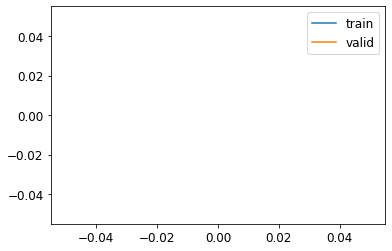

In [34]:
learn.recorder.plot_loss()

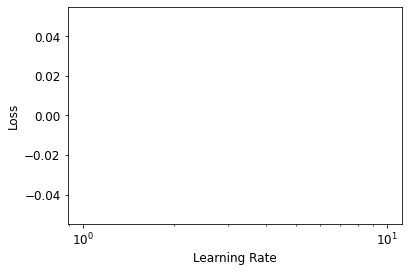

In [35]:
learn.recorder.plot_lr_find()

In [ ]:
#learn_lm = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5,metrics=[error_rate, accuracy, Perplexity()]).to_fp16()

##Validation

In [37]:
df_test['text'].replace(np.nan, '-', inplace=True)

In [38]:
# create dataloader of test
dblock_test = DataBlock(
    blocks=(TextBlock.from_df(['text'], seq_len=72), CategoryBlock),
            get_x=get_features, 
            get_y=get_labels)

dloader_test = dblock_test.dataloaders(df_test, bs=128)

In [39]:
test_dl = dloader_test.test_dl(df_test['text'])
preds = learn.get_preds(dl=test_dl, with_decoded=True)

In [40]:
len(preds)

3

In [41]:
learn.validate()

(#4) [0.6187943816184998,0.17272931337356567,0.8272706866264343,1.8566882610321045]

In [42]:
preds,y,losses = learn.get_preds(with_loss=True)
predictions = np.argmax(preds, axis = 1)

(#4) [0.6187943816184998,0.17272931337356567,0.8272706866264343,1.8566882610321045]

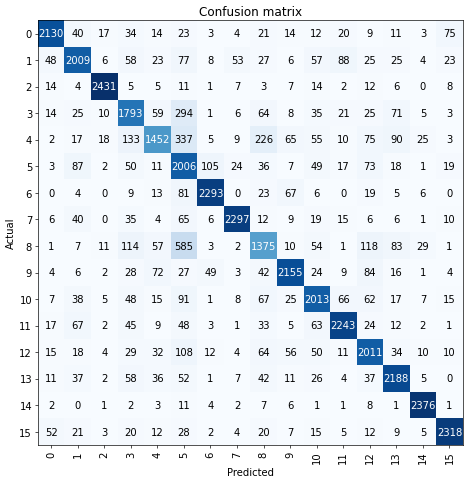

In [43]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)
learn.validate()

In [44]:
learn.freeze()
learn.fit_one_cycle(5, 2e-3, cbs=cbs)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.298729,0.672618,0.178804,0.821196,1.959359,11:59
1,0.321273,0.630718,0.175704,0.824296,1.878960,11:57
2,0.438187,0.577932,0.157354,0.842646,1.782349,11:59
3,0.359984,0.622407,0.174054,0.825946,1.863409,11:57
4,0.377189,0.595217,0.167179,0.832821,1.813424,11:57


Better model found at epoch 0 with valid_loss value: 0.6726175546646118.
Better model found at epoch 1 with valid_loss value: 0.6307182312011719.
Better model found at epoch 2 with valid_loss value: 0.5779319405555725.


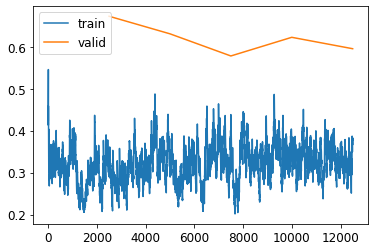

In [45]:
learn.recorder.plot_loss()

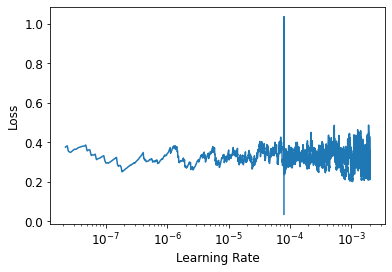

In [46]:
learn.recorder.plot_lr_find()

In [47]:
learn.save('model_'+ now)
learn.save_encoder('model_enc'+ now)

In [48]:
test_dl = dloader_test.test_dl(df_test['text'])
preds = learn.get_preds(dl=test_dl, with_decoded=True)

In [49]:
preds,y,losses = learn.get_preds(with_loss=True)
predictions = np.argmax(preds, axis = 1)

(#4) [0.5779319405555725,0.157353937625885,0.842646062374115,1.7823486328125]

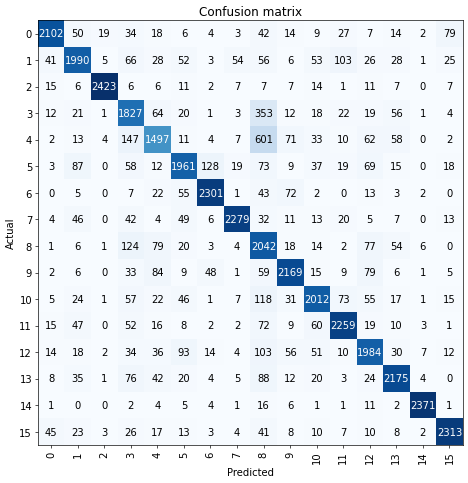

In [50]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)
learn.validate()

In [51]:
learn.fine_tune(3, 2e-2, cbs=cbs)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.422656,0.647545,0.177054,0.822946,1.910844,11:56


Better model found at epoch 0 with valid_loss value: 0.647544801235199.


epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.478310,0.678573,0.196005,0.803995,1.971063,30:16
1,0.522709,0.588644,0.172229,0.827771,1.801543,30:13
2,0.317899,0.603611,0.168254,0.831746,1.828711,30:18


Better model found at epoch 0 with valid_loss value: 0.6785731911659241.
Better model found at epoch 1 with valid_loss value: 0.5886437892913818.


In [52]:
learn.save('model_'+ now)

Path('/content/drive/MyDrive/Colab Notebooks/Datasets/RVL_CDIP/checkpoints/models/model_2022-02-21-10:43:35.pth')

In [53]:
learn.freeze_to(-2)
learn.fit_one_cycle(3, slice(1e-2/(2.6**4),1e-2), cbs=cbs)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.431145,0.604836,0.169404,0.830596,1.830952,14:30
1,0.420240,0.586898,0.173079,0.826921,1.798401,14:31
2,0.368111,0.602220,0.170654,0.829346,1.826168,14:31


Better model found at epoch 0 with valid_loss value: 0.6048358082771301.
Better model found at epoch 1 with valid_loss value: 0.5868977904319763.


In [54]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.401505,0.567633,0.162504,0.837496,1.764087,23:22


In [55]:
learn.save('model_'+ now)

Path('/content/drive/MyDrive/Colab Notebooks/Datasets/RVL_CDIP/checkpoints/models/model_2022-02-21-10:43:35.pth')

In [ ]:
# ajuste do modelo
learn.fine_tune(5, 1e-2, cbs=cbs)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.392812,0.626564,0.178254,0.821746,1.871171,07:12


Better model found at epoch 0 with valid_loss value: 0.6265643835067749.


epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.331763,0.591622,0.156704,0.843296,1.806916,15:34
1,0.309145,0.630854,0.179204,0.820796,1.879215,15:34
2,0.287077,0.635223,0.168654,0.831346,1.887443,15:34
3,0.182471,0.694173,0.176829,0.823171,2.002052,15:34
4,0.206678,0.667225,0.158754,0.841246,1.948822,15:35


Better model found at epoch 0 with valid_loss value: 0.5916216969490051.


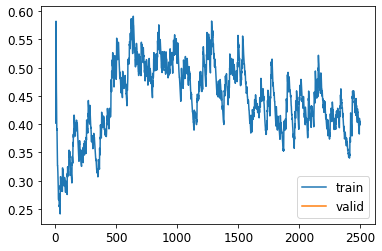

In [56]:
learn.recorder.plot_loss()

In [59]:
learn.save('model_'+ now)

Path('/content/drive/MyDrive/Colab Notebooks/Datasets/RVL_CDIP/checkpoints/models/model_2022-02-21-10:43:35.pth')

In [57]:
test_dl = dloader_test.test_dl(df_test['text'])
preds = learn.get_preds(dl=test_dl, with_decoded=True)

(#4) [0.5676332712173462,0.16250406205654144,0.8374959230422974,1.7640869617462158]

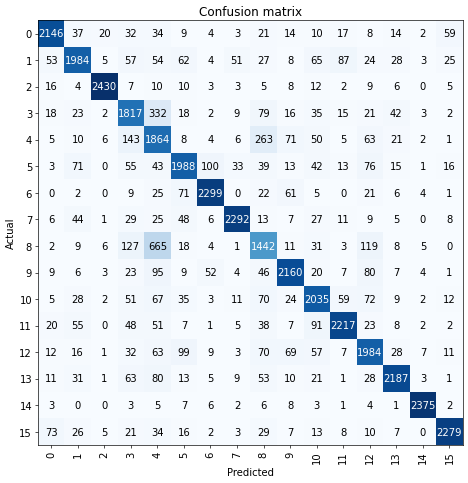

In [58]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)
learn.validate()

In [60]:
learn.unfreeze()
learn.fit_one_cycle(3, 2e-3, cbs=cbs)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.646147,0.648528,0.197030,0.802970,1.912723,30:13
1,0.423815,0.593974,0.178179,0.821821,1.811171,30:08
2,0.350169,0.596905,0.172304,0.827696,1.816488,30:10


Better model found at epoch 0 with valid_loss value: 0.648527979850769.
Better model found at epoch 1 with valid_loss value: 0.5939737558364868.


In [61]:
learn.save('model_'+ now)
learn.save_encoder('model_enc'+ now)

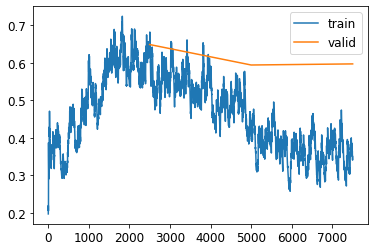

In [62]:
learn.recorder.plot_loss()

In [63]:
test_dl = dloader_test.test_dl(df_test['text'])
preds = learn.get_preds(dl=test_dl, with_decoded=True)

In [64]:
preds,y,losses = learn.get_preds(with_loss=True)
predictions = np.argmax(preds, axis = 1)

(#4) [0.5939737558364868,0.17817945778369904,0.8218205571174622,1.811171293258667]

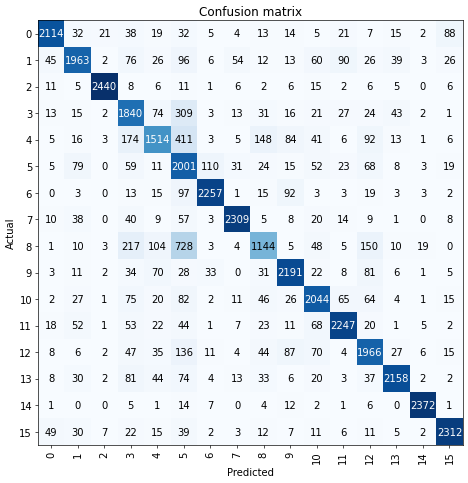

In [65]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)
learn.validate()